In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.realpath("/home/localssk23/Insta_Matching/overlap_metrics")))

from overlap_metrics.panoptic_quality import pq
from overlap_metrics.cluster_dice import cluster_dice
from overlap_metrics.lesion_wise_dice import lesion_wise_dice
from overlap_metrics.legacy_dice import legacy_dice as dice
from overlap_metrics.region_dice import region_dice
from overlap_metrics.blob_dice import blob_dice

In [2]:
from metrics_utils.gpu_connected_components import get_connected_components

In [3]:
import torch

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import numpy as np
import pandas as pd

# Utils

In [4]:
def calculate_iou(gt_mask, pred_mask):
    intersection = torch.logical_and(gt_mask, pred_mask)
    union = torch.logical_or(gt_mask, pred_mask)
    iou = torch.sum(intersection) / torch.sum(union) if torch.sum(union) > 0 else 0
    return iou

def calculate_intersection_over_gt(gt_mask, pred_mask):
    intersection = torch.logical_and(gt_mask, pred_mask)
    iou = torch.sum(intersection) / torch.sum(gt_mask) if torch.sum(gt_mask) > 0 else 0
    return iou

In [5]:
# def get_detection_metrics(pred, gt, style=None):

#     # Initialize lesion counts for the case
#     lesion_counts = {'greater_than_10cc': {'gt': 0, 'pred': 0},
#                      '5_to_10cc': {'gt': 0, 'pred': 0},
#                      'less_than_5cc': {'gt': 0, 'pred': 0}}

#     # Define IoU thresholds
#     iou_thresholds = [0.00001, 0.1, 0.25, 0.5, 0.75, 1.0]

#     labeled_img, num_features_gt = get_connected_components(gt)
#     pred_labeled_img, num_features_pred = get_connected_components(pred)    

#     # Initialize the master table DataFrame
#     master_table = pd.DataFrame(columns=[
#         'Threshold', 
#         'Lesion_ID', 'Lesion_Size', 'Size_Category', 'IoU', 'Overlap', 
#     ])

#     # Iterate through ground truth lesions
#     for feature in range(1, num_features_gt + 1):
#         component_size = (labeled_img == feature).sum().item()

#         # Assign size category based on component size
#         if component_size > 1000:
#             size_category = 'greater_than_10cc'
#         elif 25 <= component_size <= 1000:
#             size_category = '5_to_10cc'
#         else:
#             size_category = 'less_than_5cc'

#         # Increment ground truth lesion count for this size category
#         lesion_counts[size_category]['gt'] += 1

#         # Get the ground truth mask for the current GT component
#         gt_mask = (labeled_img == feature)

#         # Identify the prediction labels that overlap with the GT component
#         overlapping_pred_labels = torch.unique(pred_labeled_img[gt_mask > 0])

#         # Remove background label (0)
#         overlapping_pred_labels = overlapping_pred_labels[overlapping_pred_labels > 0]

#         # If a corresponding prediction component is found, extract its mask
#         if overlapping_pred_labels is not None:
#             pred_mask = torch.isin(pred_labeled_img, overlapping_pred_labels)
#         else:
#             # If no overlapping prediction is found, set pred_mask to be an empty mask of the same shape
#             pred_mask = torch.zeros_like(gt_mask)

#         for threshold in iou_thresholds:
#             iou = calculate_iou(gt_mask, pred_mask)
#             iou = iou.cpu().numpy()
#             overlap = iou > threshold

#             # Add row to master table
#             master_table = pd.concat(
#                 [master_table, pd.DataFrame({
#                     'Trainer' : ['Trainer'],
#                     'Threshold': [threshold],
#                     'Lesion_ID': [feature],
#                     'Lesion_Size': [component_size],
#                     'Size_Category': [size_category],
#                     'IoU': [iou],
#                     'Overlap': [overlap],
#                 })],
#                 ignore_index=True
#             )

#     # Iterate through predicted lesions and update lesion counts for predicted size categories
#     for feature in range(1, num_features_pred + 1):
#         pred_component_size = (pred_labeled_img == feature).sum().item()

#         # Assign size category for prediction
#         if pred_component_size > 1000:
#             pred_size_category = 'greater_than_10cc'
#         elif 25 <= pred_component_size <= 1000:
#             pred_size_category = '5_to_10cc'
#         else:
#             pred_size_category = 'less_than_5cc'

#         # Increment predicted lesion count for this size category
#         lesion_counts[pred_size_category]['pred'] += 1

#     # return master_table
#     print(master_table)

In [6]:
from detection_metrics.detection_rate import detection_rate

In [7]:
# import numpy as np
# import pandas as pd

# def calculate_iou(gt_mask, pred_mask):
#     intersection = np.logical_and(gt_mask, pred_mask)
#     union = np.logical_or(gt_mask, pred_mask)
#     iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0
#     return iou

# def get_detection_metrics(pred, gt):

#     # Define IoU thresholds
#     iou_thresholds = [0.00001, 0.1, 0.25, 0.5, 0.75, 1.0]

#     # Initialize lesion counts for the case
#     lesion_counts = {'greater_than_10cc': {'gt': 0, 'pred': 0},
#                         '5_to_10cc': {'gt': 0, 'pred': 0},
#                         'less_than_5cc': {'gt': 0, 'pred': 0}}

#     labeled_img, num_features_gt = get_connected_components(gt)
#     pred_labeled_img, num_features_pred = get_connected_components(pred)

#     # Initialize the master table DataFrame
#     master_table = pd.DataFrame(columns=[
#         'Threshold', 
#         'Lesion_ID', 'Lesion_Size', 'Size_Category', 'IoU', 'Overlap', 
#     ])

#     # Iterate through ground truth lesions
#     for feature in range(1, num_features_gt + 1):
#         component_size = (labeled_img == feature).sum().item()

#         # Assign size category based on component size
#         if component_size > 1000:
#             size_category = 'greater_than_10cc'
#         elif 25 <= component_size <= 1000:
#             size_category = '5_to_10cc'
#         else:
#             size_category = 'less_than_5cc'

#         # Increment ground truth lesion count for this size category
#         lesion_counts[size_category]['gt'] += 1

#         # Calculate IoU for this lesion
#         gt_mask = (labeled_img == feature).cpu().numpy()
#         pred_mask = pred_labeled_img.cpu().numpy() > 0

#         fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#         ax[0].imshow(gt_mask[0])
#         ax[0].set_title('Ground Truth')
#         ax[1].imshow(pred_mask[0])
#         ax[1].set_title('Prediction')
#         plt.show()

#         for threshold in iou_thresholds:
#             iou = calculate_iou(gt_mask, pred_mask)
#             overlap = iou > threshold

#             # Add row to master table
#             master_table = pd.concat(
#                 [master_table, pd.DataFrame({
#                     'Trainer' : ['Trainer'],
#                     'Threshold': [threshold],
#                     'Lesion_ID': [feature],
#                     'Lesion_Size': [component_size],
#                     'Size_Category': [size_category],
#                     'IoU': [iou],
#                     'Overlap': [overlap],
#                 })],
#                 ignore_index=True
#             )

#     # Iterate through predicted lesions and update lesion counts for predicted size categories
#     for feature in range(1, num_features_pred + 1):
#         pred_component_size = (pred_labeled_img == feature).sum().item()

#         # Assign size category for prediction
#         if pred_component_size > 1000:
#             pred_size_category = 'greater_than_10cc'
#         elif 25 <= pred_component_size <= 1000:
#             pred_size_category = '5_to_10cc'
#         else:
#             pred_size_category = 'less_than_5cc'

#         # Increment predicted lesion count for this size category
#         lesion_counts[pred_size_category]['pred'] += 1

#     print(master_table)

In [8]:
def plot(pred, gt_display):
    pred = pred.cpu().numpy()
    gt_display = gt_display.cpu().numpy()
    gt_display = gt_display*2

    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(pred[0, :, :], cmap='gray')
    ax[0].set_title('Prediction', fontsize=15)

    ax[1].imshow(gt_display[0, :, :], cmap='gray')
    ax[1].set_title('Ground Truth', fontsize=15)

    combined = pred + gt_display

    ax[2].imshow(combined[0, :, :], cmap='rainbow')
    ax[2].set_title('Overlay (Pred +  GT)', fontsize=15)

    legend_elements = [Patch(facecolor='purple', edgecolor='black', label='TN'),
                    Patch(facecolor='turquoise', edgecolor='black', label='FP'),
                    Patch(facecolor='orange', edgecolor='black', label='FN'),
                    Patch(facecolor='red', edgecolor='black', label='TP')]

    ax[2].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1))

    plt.show()

def scores(pred, gt):

    # Compute the metrics
    pq_score = pq(pred, gt)
    region_dice_score = region_dice(pred, gt)
    blob_dice_score = blob_dice(pred, gt)
    lesion_wise_dice_score = lesion_wise_dice(pred, gt)
    cluster_dice_score = cluster_dice(pred, gt)
    dice_score = dice(pred, gt)

    print(f'PQ-DSC : {pq_score}')
    print(f'Lw-DSC : {lesion_wise_dice_score}')
    print(f'CC-DSC : {region_dice_score}')
    print(f'B-DSC  : {blob_dice_score}')
    print(f'C-DSC  : {cluster_dice_score}')
    print(f'DSC    : {dice_score}')
    print('')
    detection_rate(pred, gt, style="intersection")

# Where 'Dice' Fails and 'Instance Based Dices" Succed -  *Unfair weighing of instances*

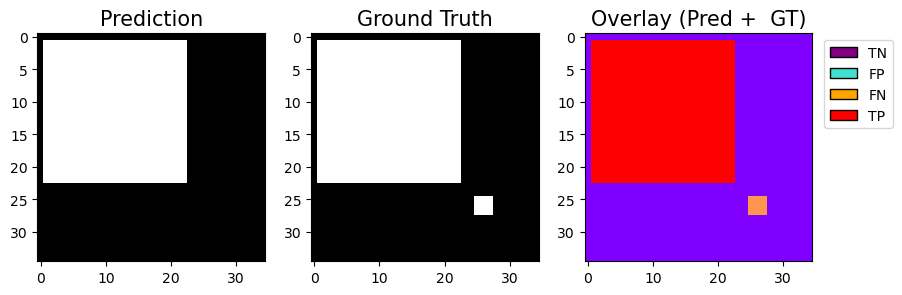

PQ-DSC : 0.5263157894736842
Lw-DSC : 0.5
CC-DSC : 0.5
B-DSC  : 0.5
C-DSC  : 0.5
DSC    : 0.9907881021499634

    Threshold Lesion_ID Lesion_Size  Size_Category  IoU Overlap  Trainer
0     0.00001         1         484      5_to_10cc  1.0    True  Trainer
1     0.10000         1         484      5_to_10cc  1.0    True  Trainer
2     0.25000         1         484      5_to_10cc  1.0    True  Trainer
3     0.50000         1         484      5_to_10cc  1.0    True  Trainer
4     0.75000         1         484      5_to_10cc  1.0    True  Trainer
5     1.00000         1         484      5_to_10cc  1.0   False  Trainer
6     0.00001         2           9  less_than_5cc  0.0   False  Trainer
7     0.10000         2           9  less_than_5cc  0.0   False  Trainer
8     0.25000         2           9  less_than_5cc  0.0   False  Trainer
9     0.50000         2           9  less_than_5cc  0.0   False  Trainer
10    0.75000         2           9  less_than_5cc  0.0   False  Trainer
11    1.00000  

In [9]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

pred[0, 1:23, 1:23] = 1
gt[0, 1:23, 1:23] = 1

# pred[0, 25:28, 27:31] = 1
gt[0, 25:28, 25:28] = 1

plot(pred, gt*2)
scores(pred, gt)

# Where Panoptic Quality & Lesion-wise Dice provide skewed results - *2 Ground Truths and 1 Prediction*

<ins> Panoptic quality: </ins> because they do not take into accoutn multiple ground truths: (below from the paper itself)

(1) during matching, group regions are not used, and 

(2) after matching, unmatched predicted segments that contain a fraction of pixels from a group of the same class over the matching threshold are removed and do not count as false positives.

<ins> Lesion-wise Dice: </ins> because the ground prediction is matched to both, and hence the false positive is being penalised twice.

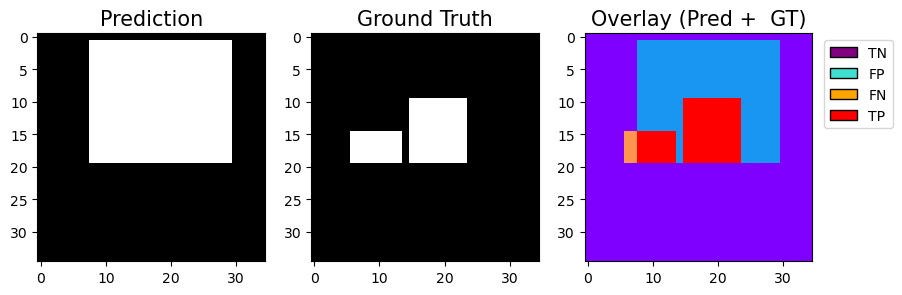

PQ-DSC : 0.35433071851730347
Lw-DSC : 0.2426675409078598
CC-DSC : 0.520382821559906
B-DSC  : 0.26980626583099365
C-DSC  : 0.43795621395111084
DSC    : 0.43795621395111084

    Threshold Lesion_ID Lesion_Size Size_Category         IoU Overlap  Trainer
0     0.00001         1          90     5_to_10cc    0.215311    True  Trainer
1     0.10000         1          90     5_to_10cc    0.215311    True  Trainer
2     0.25000         1          90     5_to_10cc    0.215311   False  Trainer
3     0.50000         1          90     5_to_10cc    0.215311   False  Trainer
4     0.75000         1          90     5_to_10cc    0.215311   False  Trainer
5     1.00000         1          90     5_to_10cc    0.215311   False  Trainer
6     0.00001         2          40     5_to_10cc  0.07009346    True  Trainer
7     0.10000         2          40     5_to_10cc  0.07009346   False  Trainer
8     0.25000         2          40     5_to_10cc  0.07009346   False  Trainer
9     0.50000         2          40   

In [10]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 15:20, 6:14] = 1
gt[0, 10:20, 15:24] = 1
pred[0, 1:20, 8:30] = 1

plot(pred, gt*2)
scores(pred, gt)

# "We want to penalize models that miss lesions all together since they could be clinically crucial."

Notice the considerable drops with the missing lesion. Here we are assuming that all lesions are of the same size to highlight this.

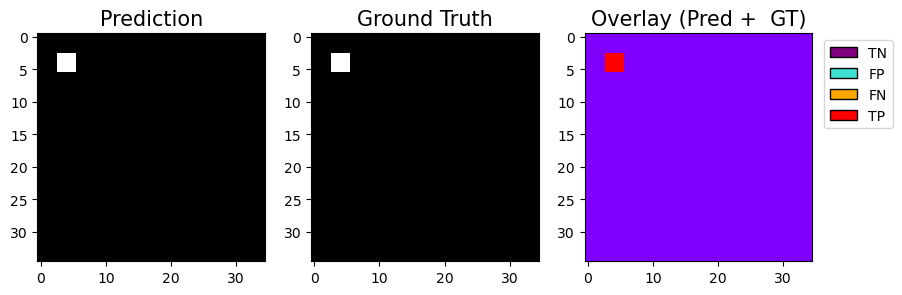

PQ-DSC : 1.0
Lw-DSC : 1.0
CC-DSC : 1.0
B-DSC  : 1.0
C-DSC  : 1.0
DSC    : 1.0

   Threshold Lesion_ID Lesion_Size  Size_Category  IoU Overlap  Trainer
0    0.00001         1           9  less_than_5cc  1.0    True  Trainer
1    0.10000         1           9  less_than_5cc  1.0    True  Trainer
2    0.25000         1           9  less_than_5cc  1.0    True  Trainer
3    0.50000         1           9  less_than_5cc  1.0    True  Trainer
4    0.75000         1           9  less_than_5cc  1.0    True  Trainer
5    1.00000         1           9  less_than_5cc  1.0   False  Trainer


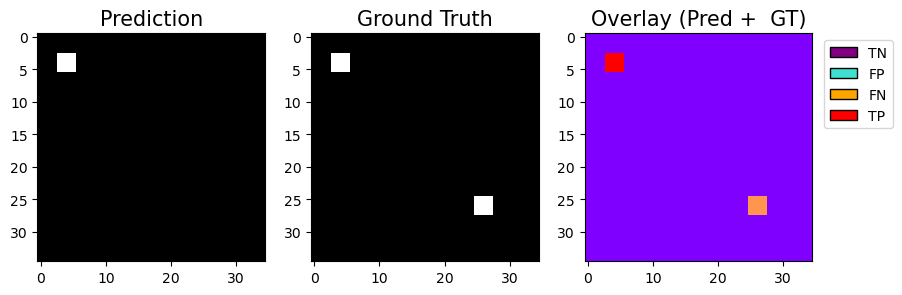

PQ-DSC : 0.5263157894736842
Lw-DSC : 0.5
CC-DSC : 0.5
B-DSC  : 0.5
C-DSC  : 0.5
DSC    : 0.6666666865348816

    Threshold Lesion_ID Lesion_Size  Size_Category  IoU Overlap  Trainer
0     0.00001         1           9  less_than_5cc  1.0    True  Trainer
1     0.10000         1           9  less_than_5cc  1.0    True  Trainer
2     0.25000         1           9  less_than_5cc  1.0    True  Trainer
3     0.50000         1           9  less_than_5cc  1.0    True  Trainer
4     0.75000         1           9  less_than_5cc  1.0    True  Trainer
5     1.00000         1           9  less_than_5cc  1.0   False  Trainer
6     0.00001         2           9  less_than_5cc  0.0   False  Trainer
7     0.10000         2           9  less_than_5cc  0.0   False  Trainer
8     0.25000         2           9  less_than_5cc  0.0   False  Trainer
9     0.50000         2           9  less_than_5cc  0.0   False  Trainer
10    0.75000         2           9  less_than_5cc  0.0   False  Trainer
11    1.00000  

In [11]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 3:6, 3:6] = 1
pred[0, 3:6, 3:6] = 1

plot(pred, gt*2)
scores(pred, gt)

##########################################

pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 3:6, 3:6] = 1
pred[0, 3:6, 3:6] = 1

gt[0, 25:28, 25:28] = 1

plot(pred, gt*2)
scores(pred, gt)

# "We also want to penalize the model if it produces false positive lesions, because the legacy dice score don’t cater to that problem."

Notice the considerable drops with the False Positive lesion. Here we are assuming that all lesions are of the same size to highlight this.

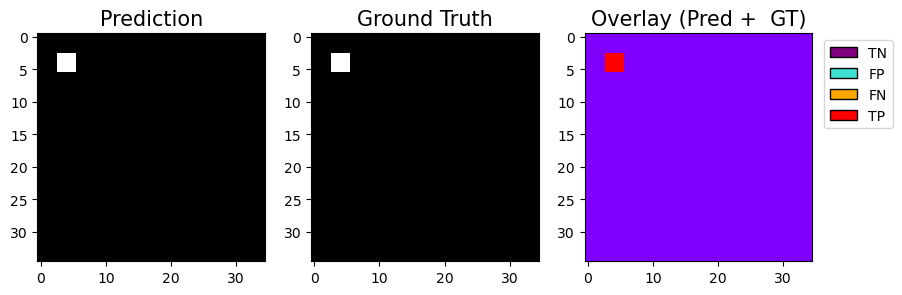

PQ-DSC : 1.0
Lw-DSC : 1.0
CC-DSC : 1.0
B-DSC  : 1.0
C-DSC  : 1.0
DSC    : 1.0

   Threshold Lesion_ID Lesion_Size  Size_Category  IoU Overlap  Trainer
0    0.00001         1           9  less_than_5cc  1.0    True  Trainer
1    0.10000         1           9  less_than_5cc  1.0    True  Trainer
2    0.25000         1           9  less_than_5cc  1.0    True  Trainer
3    0.50000         1           9  less_than_5cc  1.0    True  Trainer
4    0.75000         1           9  less_than_5cc  1.0    True  Trainer
5    1.00000         1           9  less_than_5cc  1.0   False  Trainer


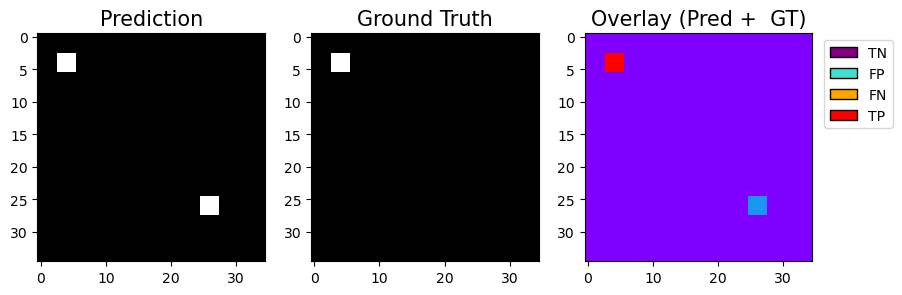

PQ-DSC : 0.5263157894736842
Lw-DSC : 0.5
CC-DSC : 0.6666666865348816
B-DSC  : 0.6666666865348816
C-DSC  : 0.5
DSC    : 0.6666666865348816

   Threshold Lesion_ID Lesion_Size  Size_Category  IoU Overlap  Trainer
0    0.00001         1           9  less_than_5cc  1.0    True  Trainer
1    0.10000         1           9  less_than_5cc  1.0    True  Trainer
2    0.25000         1           9  less_than_5cc  1.0    True  Trainer
3    0.50000         1           9  less_than_5cc  1.0    True  Trainer
4    0.75000         1           9  less_than_5cc  1.0    True  Trainer
5    1.00000         1           9  less_than_5cc  1.0   False  Trainer


In [12]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 3:6, 3:6] = 1
pred[0, 3:6, 3:6] = 1

plot(pred, gt*2)
scores(pred, gt)

##########################################

pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 3:6, 3:6] = 1
pred[0, 3:6, 3:6] = 1

pred[0, 25:28, 25:28] = 1
# gt[0, 25:28, 25:28] = 1

plot(pred, gt*2)
scores(pred, gt)

# Cluster Dice and Region Dice ensures proper pixel-wsie assignment

In the below case: Representation of improper pixel-wise assignment. 

Taking the bottom GT lesion, it will be assigned the bottom two Pred lesions. However, that will cause the edge pixels, which are actually true positive to be calculated as false positives. This is not reflected in the "component" wise assignment but on a pixel level, they are treated seperately. This does occur in C-Dice as it is evaluated as a whole.

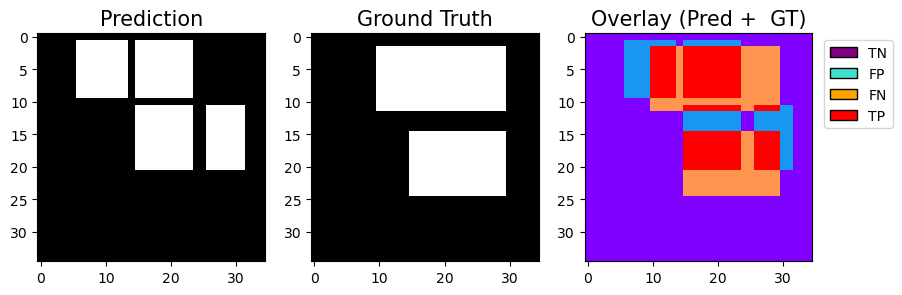

PQ-DSC : 0.4812277555465698
Lw-DSC : 0.4926043748855591
CC-DSC : 0.5998522043228149
B-DSC  : 0.507436990737915
C-DSC  : 0.5972434878349304
DSC    : 0.5972434878349304

    Threshold Lesion_ID Lesion_Size Size_Category         IoU Overlap  Trainer
0     0.00001         1         200     5_to_10cc   0.3031088    True  Trainer
1     0.10000         1         200     5_to_10cc   0.3031088    True  Trainer
2     0.25000         1         200     5_to_10cc   0.3031088    True  Trainer
3     0.50000         1         200     5_to_10cc   0.3031088   False  Trainer
4     0.75000         1         200     5_to_10cc   0.3031088   False  Trainer
5     1.00000         1         200     5_to_10cc   0.3031088   False  Trainer
6     0.00001         2         150     5_to_10cc  0.35135135    True  Trainer
7     0.10000         2         150     5_to_10cc  0.35135135    True  Trainer
8     0.25000         2         150     5_to_10cc  0.35135135    True  Trainer
9     0.50000         2         150     5_

In [13]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

pred[0, 1:10, 6:14] = 1
pred[0, 1:10, 15:24] = 1
pred[0, 11:21, 15:24] = 1
pred[0, 11:21, 26:32] = 1

gt[0, 2:12, 10:30] = 1
gt[0, 15:25, 15:30] = 1

plot(pred, gt*2)
scores(pred, gt)

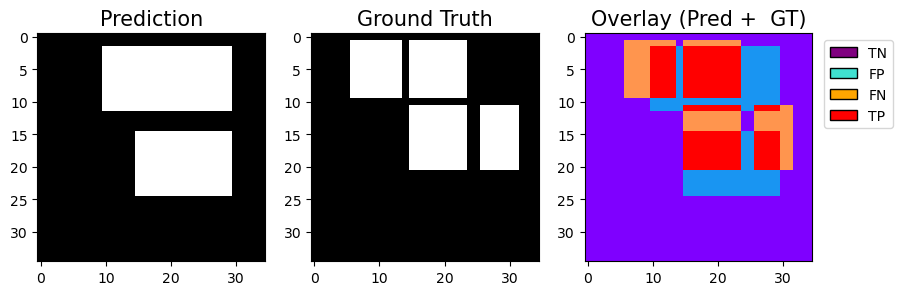

PQ-DSC : 0.4812277555465698
Lw-DSC : 0.2926746606826782
CC-DSC : 0.5757445693016052
B-DSC  : 0.3385450839996338
C-DSC  : 0.5972434878349304
DSC    : 0.5972434878349304

    Threshold Lesion_ID Lesion_Size Size_Category         IoU Overlap  Trainer
0     0.00001         1          72     5_to_10cc  0.13333334    True  Trainer
1     0.10000         1          72     5_to_10cc  0.13333334    True  Trainer
2     0.25000         1          72     5_to_10cc  0.13333334   False  Trainer
3     0.50000         1          72     5_to_10cc  0.13333334   False  Trainer
4     0.75000         1          72     5_to_10cc  0.13333334   False  Trainer
5     1.00000         1          72     5_to_10cc  0.13333334   False  Trainer
6     0.00001         2          81     5_to_10cc  0.34449762    True  Trainer
7     0.10000         2          81     5_to_10cc  0.34449762    True  Trainer
8     0.25000         2          81     5_to_10cc  0.34449762    True  Trainer
9     0.50000         2          81     5

In [14]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 1:10, 6:14] = 1
gt[0, 1:10, 15:24] = 1
gt[0, 11:21, 15:24] = 1
gt[0, 11:21, 26:32] = 1

pred[0, 2:12, 10:30] = 1
pred[0, 15:25, 15:30] = 1

plot(pred, gt*2)
scores(pred, gt)

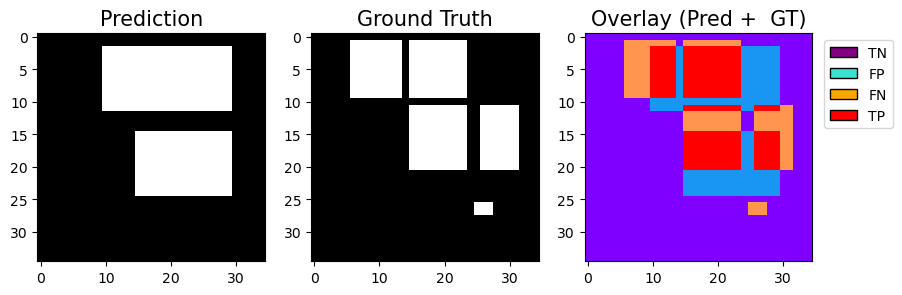

PQ-DSC : 0.3318812107217723
Lw-DSC : 0.23413972556591034
CC-DSC : 0.46666398644447327
B-DSC  : 0.27083608508110046
C-DSC  : 0.2986217439174652
DSC    : 0.5918057560920715

    Threshold Lesion_ID Lesion_Size  Size_Category         IoU Overlap  \
0     0.00001         1          72      5_to_10cc  0.13333334    True   
1     0.10000         1          72      5_to_10cc  0.13333334    True   
2     0.25000         1          72      5_to_10cc  0.13333334   False   
3     0.50000         1          72      5_to_10cc  0.13333334   False   
4     0.75000         1          72      5_to_10cc  0.13333334   False   
5     1.00000         1          72      5_to_10cc  0.13333334   False   
6     0.00001         2          81      5_to_10cc  0.34449762    True   
7     0.10000         2          81      5_to_10cc  0.34449762    True   
8     0.25000         2          81      5_to_10cc  0.34449762    True   
9     0.50000         2          81      5_to_10cc  0.34449762   False   
10    0.75000 

In [15]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 1:10, 6:14] = 1
gt[0, 1:10, 15:24] = 1
gt[0, 11:21, 15:24] = 1
gt[0, 11:21, 26:32] = 1
gt[0, 26:28, 25:28] = 1

pred[0, 2:12, 10:30] = 1
pred[0, 15:25, 15:30] = 1

plot(pred, gt*2)
scores(pred, gt)

# Case where the choice of Matching Really Shines!!

Cluster/Region: Overall High score

Panoptic: Only chooses the Best prediction

Lesion-Wise: Penalises Heavily

Normal: Just normal!

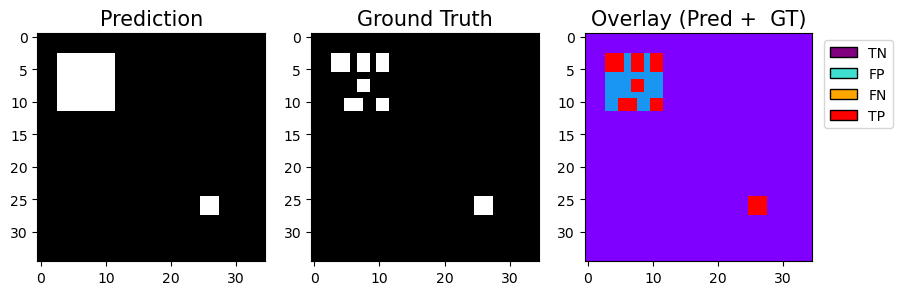

PQ-DSC : 0.5999999940395355
Lw-DSC : 0.25743263959884644
CC-DSC : 0.663642406463623
B-DSC  : 0.21135514974594116
C-DSC  : 0.8017241358757019
DSC    : 0.6567164063453674

    Threshold Lesion_ID Lesion_Size  Size_Category          IoU Overlap  \
0     0.00001         1           9  less_than_5cc   0.11111111    True   
1     0.10000         1           9  less_than_5cc   0.11111111    True   
2     0.25000         1           9  less_than_5cc   0.11111111   False   
3     0.50000         1           9  less_than_5cc   0.11111111   False   
4     0.75000         1           9  less_than_5cc   0.11111111   False   
5     1.00000         1           9  less_than_5cc   0.11111111   False   
6     0.00001         2           6  less_than_5cc  0.074074075    True   
7     0.10000         2           6  less_than_5cc  0.074074075   False   
8     0.25000         2           6  less_than_5cc  0.074074075   False   
9     0.50000         2           6  less_than_5cc  0.074074075   False   
10   

In [16]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 3:6, 3:6] = 1
gt[0, 3:6, 7:9] = 1
gt[0, 3:6, 10:12] = 1
gt[0, 7:9, 7:9] = 1
gt[0, 10:12, 10:12] = 1
gt[0, 10:12, 5:8] = 1

pred[0, 3:12, 3:12] = 1

pred[0, 25:28, 25:28] = 1
gt[0, 25:28, 25:28] = 1

plot(pred, gt*2)
scores(pred, gt)

# Special Cases

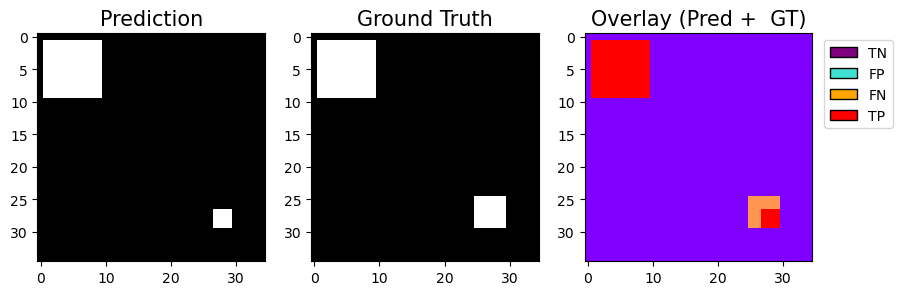

PQ-DSC : 0.7647058963775635
Lw-DSC : 0.7647058963775635
CC-DSC : 0.7647058963775635
B-DSC  : 0.7647058963775635
C-DSC  : 0.7647058963775635
DSC    : 0.918367326259613

    Threshold Lesion_ID Lesion_Size Size_Category   IoU Overlap  Trainer
0     0.00001         1          81     5_to_10cc   1.0    True  Trainer
1     0.10000         1          81     5_to_10cc   1.0    True  Trainer
2     0.25000         1          81     5_to_10cc   1.0    True  Trainer
3     0.50000         1          81     5_to_10cc   1.0    True  Trainer
4     0.75000         1          81     5_to_10cc   1.0    True  Trainer
5     1.00000         1          81     5_to_10cc   1.0   False  Trainer
6     0.00001         2          25     5_to_10cc  0.36    True  Trainer
7     0.10000         2          25     5_to_10cc  0.36    True  Trainer
8     0.25000         2          25     5_to_10cc  0.36    True  Trainer
9     0.50000         2          25     5_to_10cc  0.36   False  Trainer
10    0.75000         2      

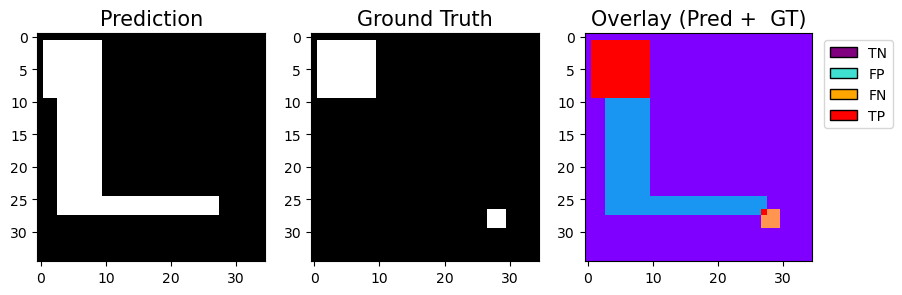

PQ-DSC : 0.4736841917037964
Lw-DSC : 0.24054580926895142
CC-DSC : 0.29501718282699585
B-DSC  : 0.2428276538848877
C-DSC  : 0.4672364592552185
DSC    : 0.4672364592552185

    Threshold Lesion_ID Lesion_Size  Size_Category          IoU Overlap  \
0     0.00001         1          81      5_to_10cc   0.31034482    True   
1     0.10000         1          81      5_to_10cc   0.31034482    True   
2     0.25000         1          81      5_to_10cc   0.31034482    True   
3     0.50000         1          81      5_to_10cc   0.31034482   False   
4     0.75000         1          81      5_to_10cc   0.31034482   False   
5     1.00000         1          81      5_to_10cc   0.31034482   False   
6     0.00001         2           9  less_than_5cc  0.003717472    True   
7     0.10000         2           9  less_than_5cc  0.003717472   False   
8     0.25000         2           9  less_than_5cc  0.003717472   False   
9     0.50000         2           9  less_than_5cc  0.003717472   False   
10  

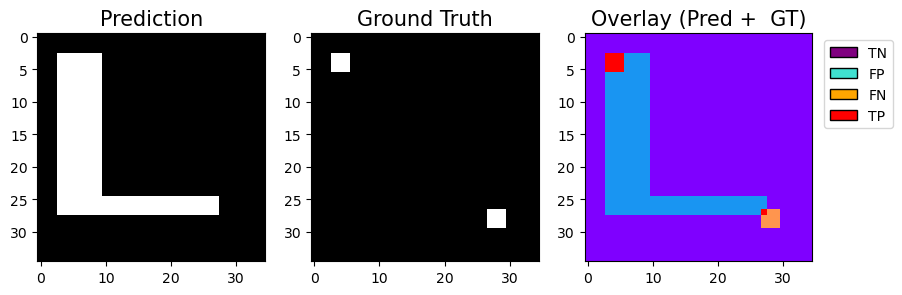

PQ-DSC : 0.07563024759292603
Lw-DSC : 0.042016807943582535
CC-DSC : 0.06542277336120605
B-DSC  : 0.04234149307012558
C-DSC  : 0.08097165822982788
DSC    : 0.08097165822982788

    Threshold Lesion_ID Lesion_Size  Size_Category          IoU Overlap  \
0     0.00001         1           9  less_than_5cc   0.03930131    True   
1     0.10000         1           9  less_than_5cc   0.03930131   False   
2     0.25000         1           9  less_than_5cc   0.03930131   False   
3     0.50000         1           9  less_than_5cc   0.03930131   False   
4     0.75000         1           9  less_than_5cc   0.03930131   False   
5     1.00000         1           9  less_than_5cc   0.03930131   False   
6     0.00001         2           9  less_than_5cc  0.004219409    True   
7     0.10000         2           9  less_than_5cc  0.004219409   False   
8     0.25000         2           9  less_than_5cc  0.004219409   False   
9     0.50000         2           9  less_than_5cc  0.004219409   False   

In [17]:
pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

pred[0, 1:10, 1:10] = 1
gt [0, 1:10, 1:10] = 1

pred[0, 27:30, 27:30] = 1
gt [0, 25:30, 25:30] = 1

plot(pred, gt*2)
scores(pred, gt)

##############################

pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 1:10, 1:10] = 1
pred [0, 1:10, 1:10] = 1

gt[0, 27:30, 27:30] = 1

pred [0, 25:28, 25:28] = 1
pred [0, 25:28, 3:28] = 1
pred [0, 3:28, 3:10] = 1

plot(pred, gt*2)
scores(pred, gt)

##############################

pred = torch.zeros((10, 35, 35)).cuda()
gt   = torch.zeros((10, 35, 35)).cuda()

gt[0, 3:6, 3:6] = 1
pred [0, 3:6, 3:6] = 1

gt[0, 27:30, 27:30] = 1

pred [0, 25:28, 25:28] = 1
pred [0, 25:28, 3:28] = 1
pred [0, 3:28, 3:10] = 1

plot(pred, gt*2)
scores(pred, gt)